In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [266]:
#The data is read from the given csv file
df = pd.read_csv('SDS_Hackathon_Dataset_30_11_22.csv',usecols=range(1,8))
df

,Active,Rest,Smoke,Gender,Exercise,Hgt,Wgt
0,97.0,78.0,0.0,1.0,1.0,63.0,119.0
1,82.0,68.0,1.0,0.0,3.0,70.0,225.0
2,88.0,62.0,0.0,0.0,3.0,72.0,175.0
3,106.0,74.0,0.0,0.0,3.0,72.0,170.0
4,78.0,63.0,0.0,1.0,3.0,67.0,125.0
...,...,...,...,...,...,...,...
227,105.0,85.0,0.0,1.0,2.0,64.0,150.0
228,82.0,74.0,0.0,1.0,3.0,66.0,124.0
229,102.0,81.0,0.0,0.0,2.0,69.0,172.0
230,87.0,67.0,0.0,0.0,2.0,68.0,170.0


In [267]:
#The number of nan values or blank values are measured
df.isna().sum()

Active       2
Rest         3
Smoke        4
Gender       6
Exercise     1
Hgt          9
Wgt         15
dtype: int64

In [268]:
#The empty values are filled with other values
exer = int(df['Exercise'].mode())
gend = int(df['Gender'].mode())
smoke = int(df['Smoke'].mode())

df['Gender'].fillna(value=gend,inplace=True)
df['Smoke'].fillna(value=smoke,inplace=True)
df['Exercise'].fillna(value=exer,inplace=True)
df['Active'].fillna(value=df['Active'].mean(),inplace=True)
df['Rest'].fillna(value=df['Rest'].mean(),inplace=True)
df['Hgt'].fillna(value=df.groupby('Gender')['Hgt'].transform('mean'),inplace=True)
df['Wgt'].fillna(value=df.groupby('Gender')['Wgt'].transform('mean'),inplace=True)

df.isna().sum()

Active      0
Rest        0
Smoke       0
Gender      0
Exercise    0
Hgt         0
Wgt         0
dtype: int64

In [269]:
#To find the high level characteristics of the data

no_students = len(df['Active'])
attr = list(df.columns.values)
nominal = ['Smoke','Gender']
discrete = ['Active','Rest','Exercise','Hgt','Wgt']
print("The number of undergrad students in the study is ",no_students)
print("The attributes of the data are as follows: ")
print(attr)
print("The attributes which are categorical and nominal values in the dataset is")
print(nominal)
print("The attributes which are nominal and discrete values in the dataset is")
print(discrete)


The number of undergrad students in the study is  232
The attributes of the data are as follows: 
['Active', 'Rest', 'Smoke', 'Gender', 'Exercise', 'Hgt', 'Wgt']
The attributes which are categorical and nominal values in the dataset is
['Smoke', 'Gender']
The attributes which are nominal and discrete values in the dataset is
['Active', 'Rest', 'Exercise', 'Hgt', 'Wgt']


In [270]:
print('For the Active attribute')
print("The measure of central tendency is median. The median value is",df['Active'].median())
print("The std deviation is",df['Active'].std())
print("The range of values is",(df['Active'].min(),df['Active'].max()))

For the Active attribute
The measure of central tendency is median. The median value is 89.0
The std deviation is 18.79871286806502
The range of values is (51.0, 154.0)


In [271]:
print('For the Rest attribute')
print("The measure of central tendency is median. The median value is",df['Rest'].median())
print("The std deviation is",df['Rest'].std())
print("The range of values is",(df['Rest'].min(),df['Rest'].max()))

For the Rest attribute
The measure of central tendency is median. The median value is 68.0
The std deviation is 9.941960914044369
The range of values is (43.0, 106.0)


In [272]:
print('For the Gender attribute')
print("The measure of central tendency is mode. The mode value is",int(df['Gender'].mode()))
print("The std deviation is",df['Gender'].std())
print("The range of values is",(df['Gender'].min(),df['Gender'].max()))

For the Gender attribute
The measure of central tendency is mode. The mode value is 0
The std deviation is 0.49921568579166153
The range of values is (0.0, 1.0)


In [273]:
print('For the Smoke attribute')
print("The measure of central tendency is mode. The mode value is",int(df['Smoke'].mode()))
print("The std deviation is",df['Smoke'].std())
print("The range of values is",(df['Smoke'].min(),df['Smoke'].max()))

For the Smoke attribute
The measure of central tendency is mode. The mode value is 0
The std deviation is 0.31613334148023997
The range of values is (0.0, 1.0)


In [274]:
print('For the Exercise attribute')
print("The measure of central tendency is mode. The mode value is",int(df['Exercise'].mode()))
print("The std deviation is",df['Exercise'].std())
print("The range of values is",(df['Exercise'].min(),df['Exercise'].max()))

For the Exercise attribute
The measure of central tendency is mode. The mode value is 3
The std deviation is 0.7354982023178425
The range of values is (1.0, 3.0)


In [275]:
print('For the Hgt attribute')
print("The measure of central tendency is median. The median value is",df['Hgt'].median())
print("The std deviation is",df['Hgt'].std())
print("The range of values is",(df['Hgt'].min(),df['Hgt'].max()))

For the Hgt attribute
The measure of central tendency is median. The median value is 68.5
The std deviation is 3.703955170787864
The range of values is (60.0, 78.0)


In [276]:
print('For the Wgt attribute')
print("The measure of central tendency is median. The median value is",df['Wgt'].median())
print("The std deviation is",df['Wgt'].std())
print("The range of values is",(df['Wgt'].min(),df['Wgt'].max()))

For the Wgt attribute
The measure of central tendency is median. The median value is 151.0
The std deviation is 30.817703830681115
The range of values is (102.0, 260.0)


There are two classes for Gender: male(0) and female(1).


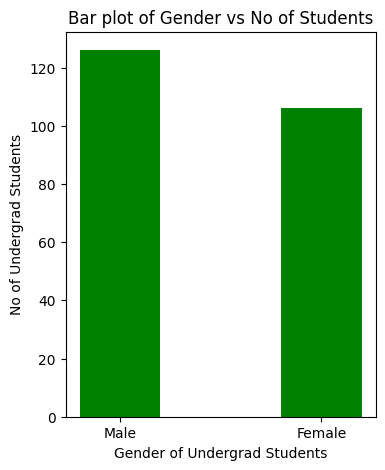

In [277]:
#Bar plot for gender
print("There are two classes for Gender: male(0) and female(1).")
male_df = df[df['Gender']==0]
female_df = df[df['Gender']==1]

fig = plt.figure(figsize=(4,5))
plt.bar(['Male','Female'],[len(male_df),len(female_df)],color='green',width=0.4)
plt.xlabel("Gender of Undergrad Students")
plt.ylabel("No of Undergrad Students")
plt.title("Bar plot of Gender vs No of Students")
plt.show()

In [278]:
#Inference from bar plot
print("From the above bar plot we can see that the number of males and females are close. There is not much disparity on the basis of gender.")

From the above bar plot we can see that the number of males and females are close. There is not much disparity on the basis of gender.


There are two classes for Smoke: Non-Smoker(0) and Smoker(1).


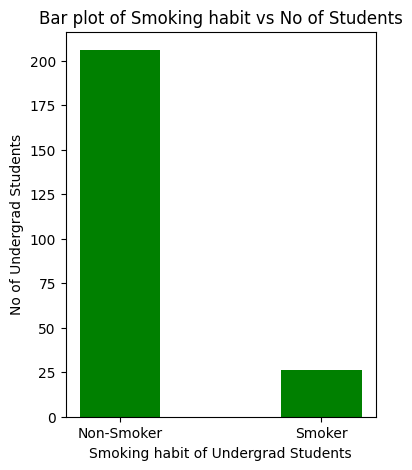

In [279]:
#Bar graph on basis of Smoke
print("There are two classes for Smoke: Non-Smoker(0) and Smoker(1).")
nonSmoker_df = df[df['Smoke']==0]
Smoker_df = df[df['Smoke']==1]

fig = plt.figure(figsize=(4,5))
plt.bar(['Non-Smoker','Smoker'],[len(nonSmoker_df),len(Smoker_df)],color='green',width=0.4)
plt.xlabel("Smoking habit of Undergrad Students")
plt.ylabel("No of Undergrad Students")
plt.title("Bar plot of Smoking habit vs No of Students")
plt.show()

In [280]:
#Inference of Smoke
print("From the above bar graph, we can infer that there is lot of disparity on the basis of smoking habits. There a lot of non-smokers commpared to that of smokers.")

From the above bar graph, we can infer that there is lot of disparity on the basis of smoking habits. There a lot of non-smokers commpared to that of smokers.


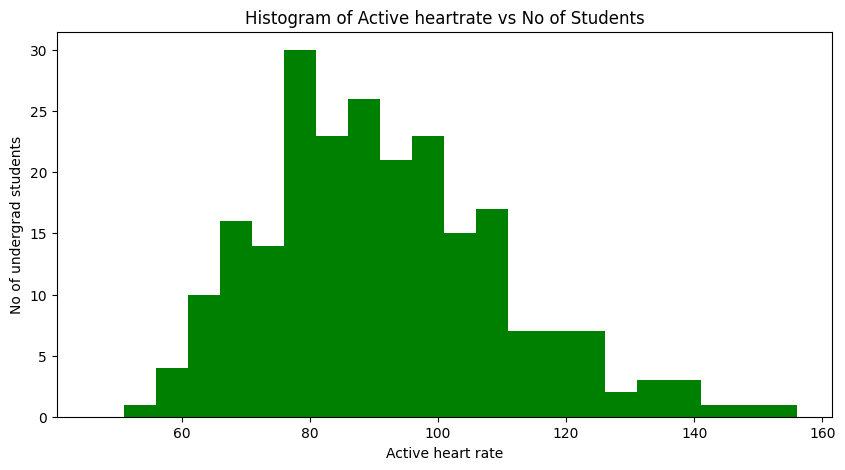

In [281]:
#Histogram for the Active attribute
subset =[]
for i in range(int(df['Active'].min())-5,int(df['Active'].max())+5,5):
    subset.append(i)

fig,hist = plt.subplots(figsize=(10,5))
hist.hist(df['Active'],subset,color='green')
plt.xlabel("Active heart rate")
plt.ylabel('No of undergrad students')
plt.title("Histogram of Active heartrate vs No of Students")
plt.show()

In [282]:
#Inference of Active
print("From the above histogram, we can see that the active heart rate is normally distributed.There are not many outliers.The data is slightly right skewed.")
print("The above data is unimodal and has a high frequency around 80.")

From the above histogram, we can see that the active heart rate is normally distributed.There are not many outliers.The data is slightly right skewed.
The above data is unimodal and has a high frequency around 80.


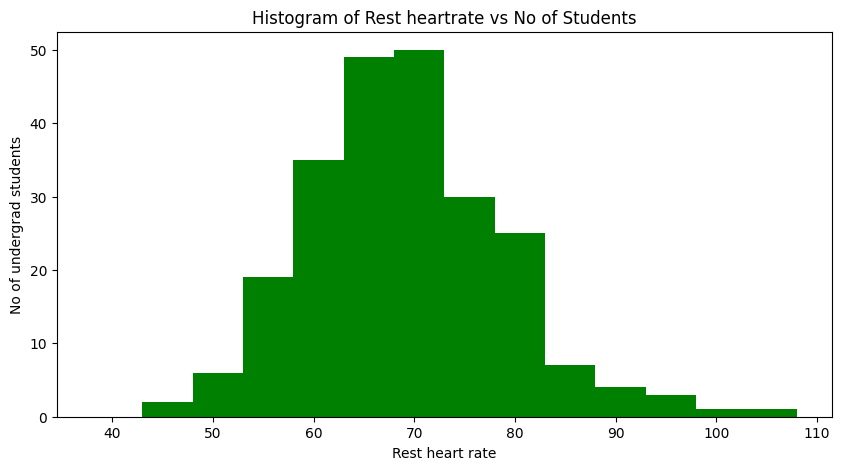

In [283]:
#Histogram for the Rest attribute
subset =[]
for i in range(int(df['Rest'].min())-5,int(df['Rest'].max())+5,5):
    subset.append(i)

fig,hist = plt.subplots(figsize=(10,5))
hist.hist(df['Rest'],subset,color='green')
plt.xlabel("Rest heart rate")
plt.ylabel('No of undergrad students')
plt.title("Histogram of Rest heartrate vs No of Students")
plt.show()

In [284]:
#Inference of Rest
print("From the above histogram, we can see that the rest heart rate is normally distributed.There are not many outliers.The data is not skewed.")
print("The data is unimodal and has a high frequnecy around the mean of 70.")

From the above histogram, we can see that the rest heart rate is normally distributed.There are not many outliers.The data is not skewed.
The data is unimodal and has a high frequnecy around the mean of 70.


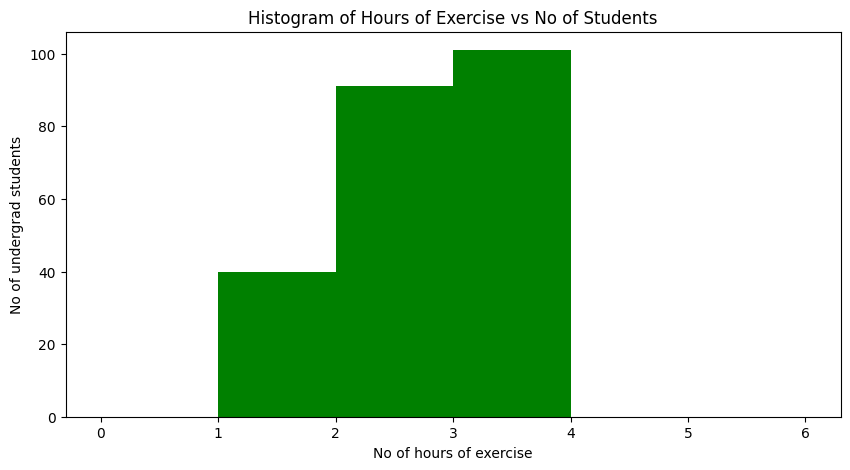

In [285]:
#Histogram for the Exercise attribute
subset =[]
for i in range(int(df['Exercise'].min()-1),int(df['Exercise'].max())+4,1):
    subset.append(i)

fig,hist = plt.subplots(figsize=(10,5))
hist.hist(df['Exercise'],subset,color='green')
plt.xlabel("No of hours of exercise")
plt.ylabel('No of undergrad students')
plt.title("Histogram of Hours of Exercise vs No of Students")
plt.show()

In [286]:
#Inference of Exercise
print("From the above histogram, we can see that the hours of exercise is skewed towards left, that is, there are more students who exercise a higher amount.")
print("The data has a unique mode at 3. However, the data is not very distributed.")

From the above histogram, we can see that the hours of exercise is skewed towards left, that is, there are more students who exercise a higher amount.
The data has a unique mode at 3. However, the data is not very distributed.


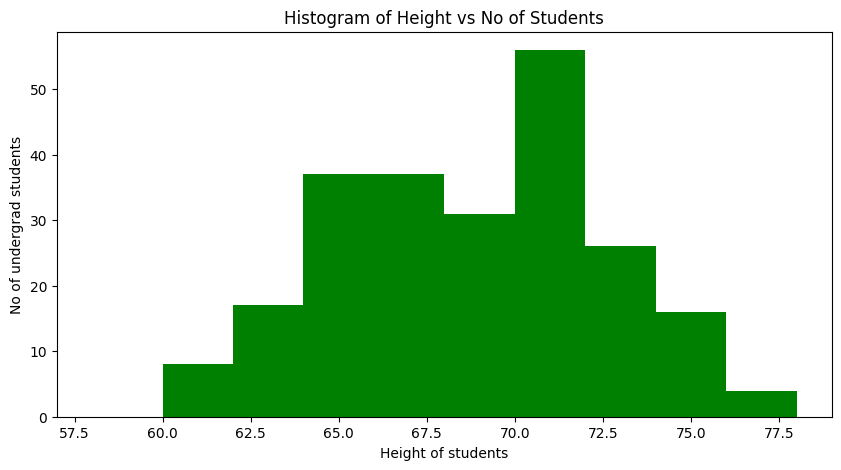

In [287]:
#Histogram for the Hgt attribute
subset =[]
for i in range(int(df['Hgt'].min())-2,int(df['Hgt'].max())+2,2):
    subset.append(i)

fig,hist = plt.subplots(figsize=(10,5))
hist.hist(df['Hgt'],subset,color='green')
plt.xlabel("Height of students")
plt.ylabel('No of undergrad students')
plt.title("Histogram of Height vs No of Students")
plt.show()

In [288]:
#Inference of Height
print("From the above histogram, we can see that the height is skewed to the left. There are a lot of students with a height of 70inches and above. ")
print("There is a unique mode at 71. The data is also distributed")

From the above histogram, we can see that the height is skewed to the left. There are a lot of students with a height of 70inches and above. 
There is a unique mode at 71. The data is also distributed


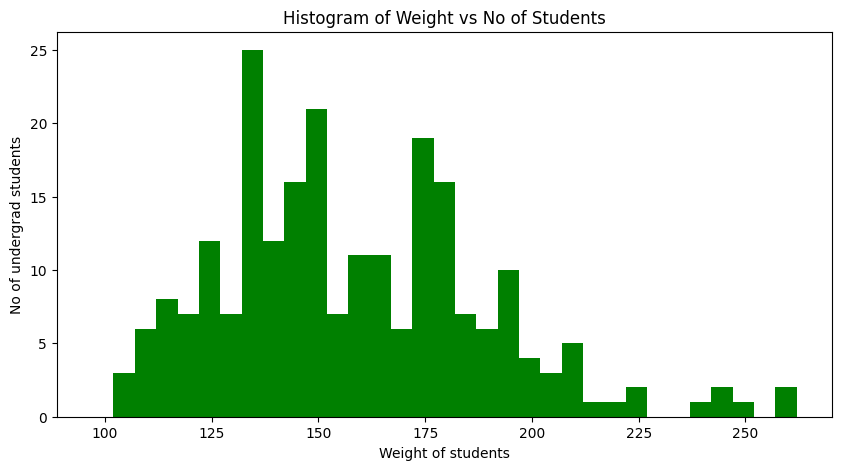

In [289]:
#Histogram for the Wgt attribute
subset =[]
for i in range(int(df['Wgt'].min())-5,int(df['Wgt'].max())+5,5):
    subset.append(i)

fig,hist = plt.subplots(figsize=(10,5))
hist.hist(df['Wgt'],subset,color='green')
plt.xlabel("Weight of students")
plt.ylabel('No of undergrad students')
plt.title("Histogram of Weight vs No of Students")
plt.show()

In [290]:
#Inference of Weight
print("From the above histogram, we can see that the weight is skewed to the right.There are very few students with a weight higher than 200 pounds.")
print("There is no unique mode for the data. There are a lot of values with high frequency.")

From the above histogram, we can see that the weight is skewed to the right.There are very few students with a weight higher than 200 pounds.
There is no unique mode for the data. There are a lot of values with high frequency.


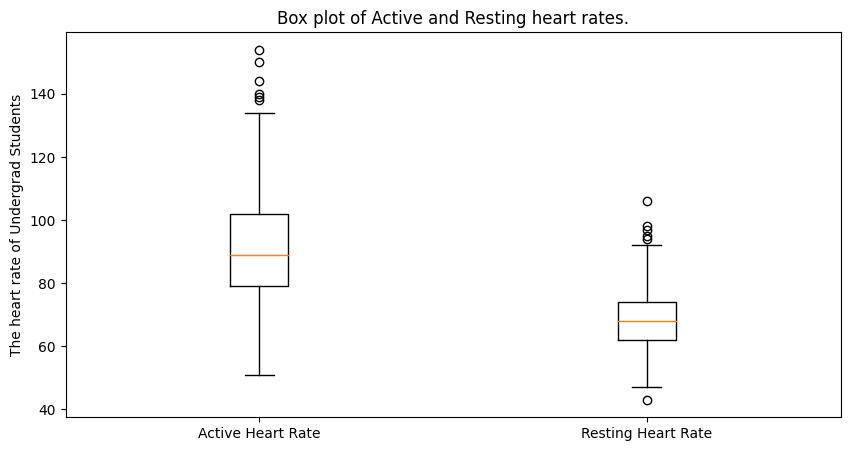

The IQR of Active is 23.0
The five number summary is 56.81304347826088 79.0 91.31304347826088 102.0 125.81304347826088
The IQR of Rest is 12.0
The five number summary is 50.35807860262008 62.0 68.35807860262008 74.0 86.35807860262008


In [291]:
#Box plot for Active and Resting
data = [df['Active'],df['Rest']]
labels=['Active Heart Rate','Resting Heart Rate']

fig = plt.figure(figsize=(10,5))
plt.boxplot(data,labels=labels)
plt.ylabel("The heart rate of Undergrad Students")
plt.title("Box plot of Active and Resting heart rates.")
plt.show()

def IQR(arr,var):
    upper = np.percentile(arr,75)
    lower = np.percentile(arr,25)
    iqr = upper - lower
    print("The IQR of {} is".format(var),iqr)
    print("The five number summary is",(np.mean(arr)-1.5*iqr),(lower),(np.mean(arr)),(upper),(np.mean(arr)+1.5*iqr))

IQR(df['Active'],'Active')
IQR(df['Rest'],'Rest')

In [292]:
#Inference for Active and Resting
print("From the above plots, we can see that active heart rate is higher than the resting heart rate.")
print("There are outliers present for both active and rest heart rates.")

From the above plots, we can see that active heart rate is higher than the resting heart rate.
There are outliers present for both active and rest heart rates.


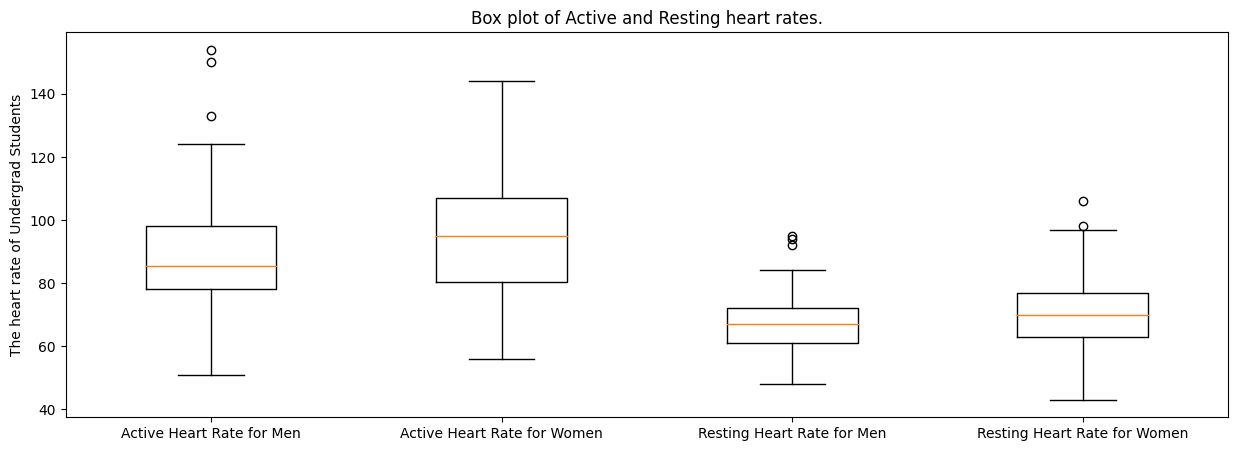

The IQR of male Active is 20.0
The five number summary is 58.065976535541765 78.0 88.06597653554176 98.0 118.06597653554176
The IQR of female Active is 26.75
The five number summary is 55.04776456111567 80.25 95.17276456111567 107.0 135.29776456111568
The IQR of male Rest is 11.0
The five number summary is 50.357732030221115 61.0 66.85773203022111 72.0 83.35773203022111
The IQR of female Rest is 13.75
The five number summary is 49.51650943396227 63.0 70.14150943396227 76.75 90.76650943396227


In [293]:
#Box plot for Active and Resting on basis of Gender
data = [male_df['Active'],female_df['Active'],male_df['Rest'],female_df['Rest']]
labels=['Active Heart Rate for Men','Active Heart Rate for Women','Resting Heart Rate for Men','Resting Heart Rate for Women']

fig = plt.figure(figsize=(15,5))
plt.boxplot(data,labels=labels)
plt.ylabel("The heart rate of Undergrad Students")
plt.title("Box plot of Active and Resting heart rates.")
plt.show()

IQR(male_df['Active'],'male Active')
IQR(female_df['Active'],'female Active')
IQR(male_df['Rest'],'male Rest')
IQR(female_df['Rest'],'female Rest')

In [294]:
#Inference for Box plot on the basis of gender
print("From the above box plot, we can see that women have a higher active and resting heart rate.")
print("Women also have a fewer outliers.")

From the above box plot, we can see that women have a higher active and resting heart rate.
Women also have a fewer outliers.


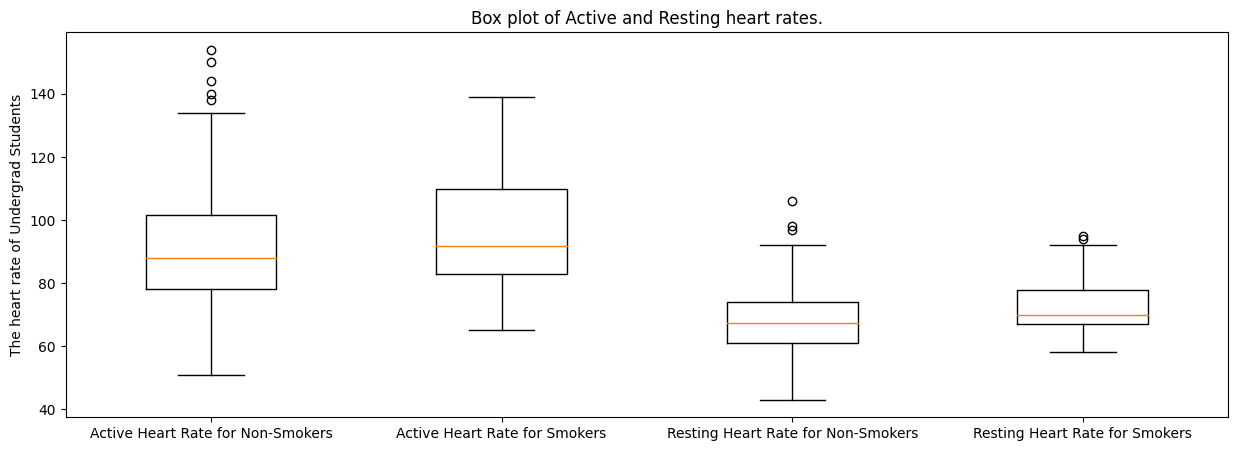

The IQR of non-smoker active is 23.5
The five number summary is 55.32433516251584 78.25 90.57433516251584 101.75 125.82433516251584
The IQR of smoker active is 27.0
The five number summary is 56.66588628762541 83.0 97.16588628762541 110.0 137.66588628762543
The IQR of non-smoker rest is 13.0
The five number summary is 48.30133124178573 61.0 67.80133124178573 74.0 87.30133124178573
The IQR of smoker rest is 10.75
The five number summary is 56.644230769230774 67.0 72.76923076923077 77.75 88.89423076923077


In [295]:
#Box plot for Active and Resting on basis of Smoke
data = [nonSmoker_df['Active'],Smoker_df['Active'],nonSmoker_df['Rest'],Smoker_df['Rest']]
labels=['Active Heart Rate for Non-Smokers','Active Heart Rate for Smokers','Resting Heart Rate for Non-Smokers','Resting Heart Rate for Smokers']

fig = plt.figure(figsize=(15,5))
plt.boxplot(data,labels=labels)
plt.ylabel("The heart rate of Undergrad Students")
plt.title("Box plot of Active and Resting heart rates.")
plt.show()

IQR(nonSmoker_df['Active'],'non-smoker active')
IQR(Smoker_df['Active'],'smoker active')
IQR(nonSmoker_df['Rest'],'non-smoker rest')
IQR(Smoker_df['Rest'],'smoker rest')

In [296]:
#Inference of Box plot on the basis of Smoker
print("From the boxplot, we can see that the active and resting heart rate of smokers is higher than that of non-smokers.")

From the boxplot, we can see that the active and resting heart rate of smokers is higher than that of non-smokers.


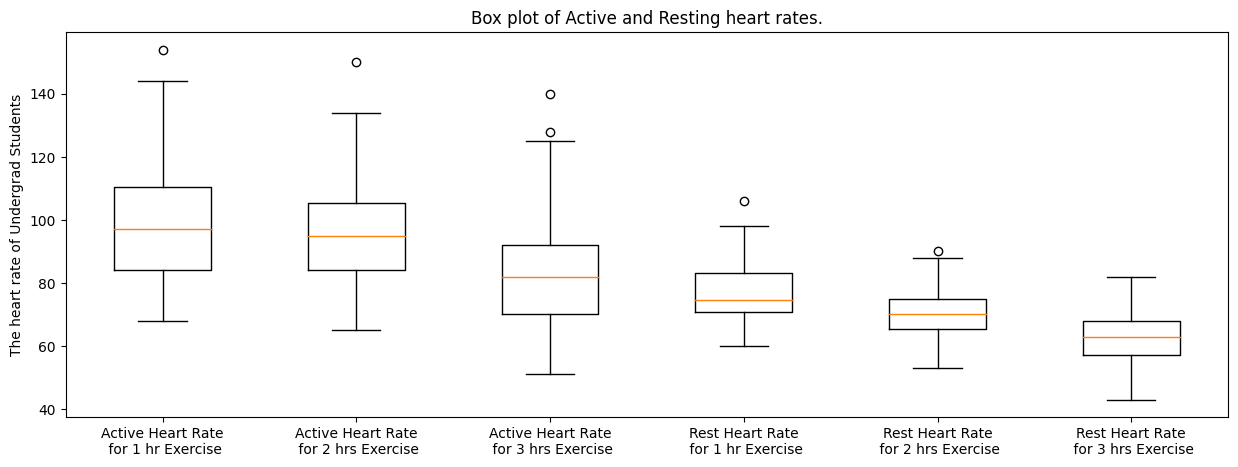

The IQR of exercise for 1 hour active is 26.25
The five number summary is 62.150000000000006 84.25 101.525 110.5 140.9
The IQR of exercise for 1 hours rest is 12.25
The five number summary is 59.025000000000006 70.75 77.4 83.0 95.775
The IQR of exercise for 2 hours active is 21.5
The five number summary is 62.79739608217869 84.0 95.0473960821787 105.5 127.2973960821787
The IQR of exercise for 2 hours rest is 9.5
The five number summary is 56.182506358270544 65.5 70.43250635827054 75.0 84.68250635827054
The IQR of exercise for 3 hours active is 22.0
The five number summary is 50.90408953938872 70.0 83.90408953938872 92.0 116.90408953938872
The IQR of exercise for 3 hours rest is 11.0
The five number summary is 46.40808076440832 57.0 62.90808076440832 68.0 79.40808076440831


In [297]:
#Box plot for Active and Resting on basis of Exercise
exer1_df = df[df['Exercise'] == 1]
exer2_df = df[df['Exercise'] == 2]
exer3_df = df[df['Exercise'] == 3]

data = [exer1_df['Active'],exer2_df['Active'],exer3_df['Active'],exer1_df['Rest'],exer2_df['Rest'],exer3_df['Rest']]
labels=['Active Heart Rate\n for 1 hr Exercise','Active Heart Rate\n for 2 hrs Exercise','Active Heart Rate\n for 3 hrs Exercise','Rest Heart Rate\n for 1 hr Exercise','Rest Heart Rate\n for 2 hrs Exercise','Rest Heart Rate\n for 3 hrs Exercise']

fig = plt.figure(figsize=(15,5))
plt.boxplot(data,labels=labels)
plt.ylabel("The heart rate of Undergrad Students")
plt.title("Box plot of Active and Resting heart rates.")
plt.show()

IQR(exer1_df['Active'],'exercise for 1 hour active')
IQR(exer1_df['Rest'],'exercise for 1 hours rest')
IQR(exer2_df['Active'],'exercise for 2 hours active')
IQR(exer2_df['Rest'],'exercise for 2 hours rest')
IQR(exer3_df['Active'],'exercise for 3 hours active')
IQR(exer3_df['Rest'],'exercise for 3 hours rest')


In [298]:
#Inference for box plot on the basis of Exercise
print("From the above box plots, we can see that the active and rest heart rate is lower for students who exercised more.")

From the above box plots, we can see that the active and rest heart rate is lower for students who exercised more.


Just by visualisation, we can see that Height v/s Weight and Active v/s Rest show strong linear corelation


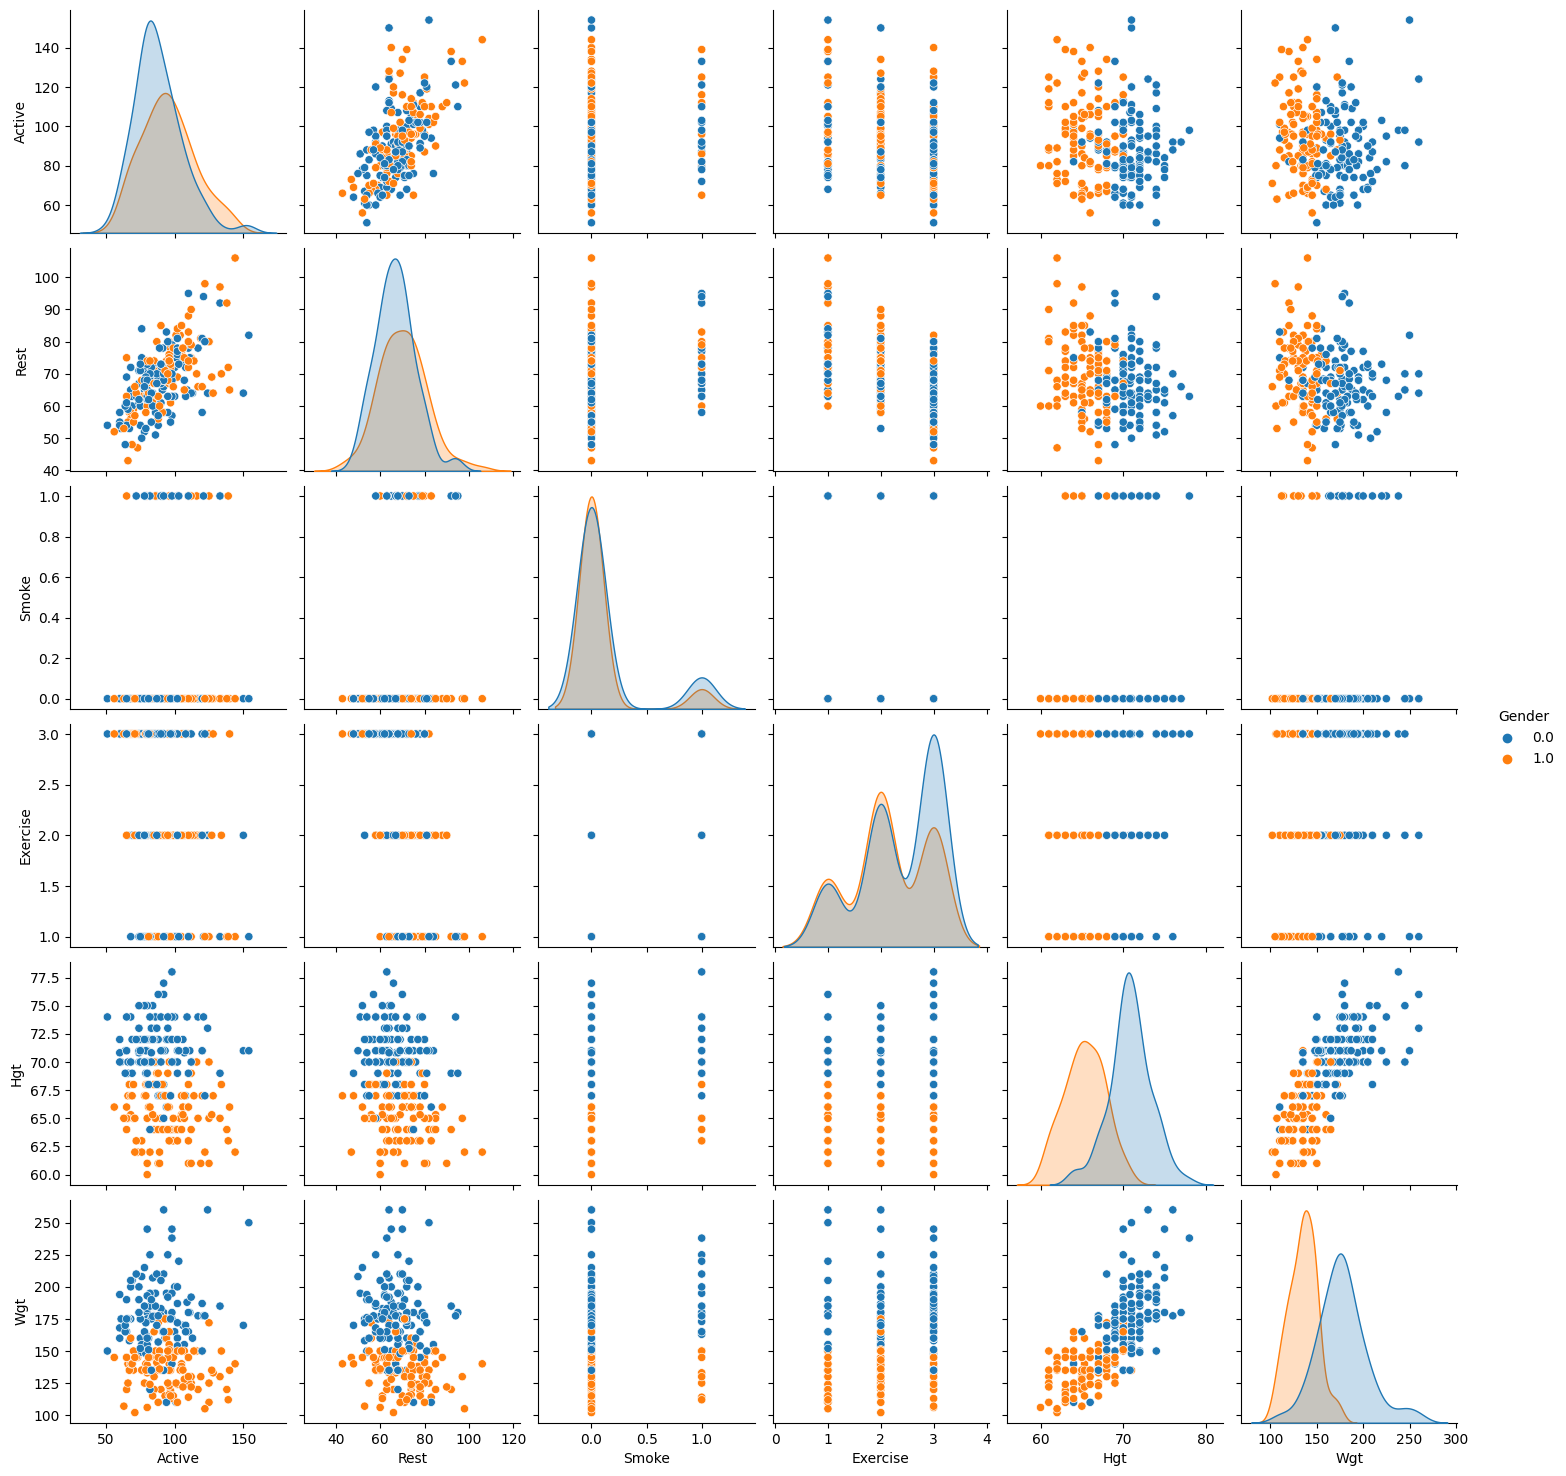

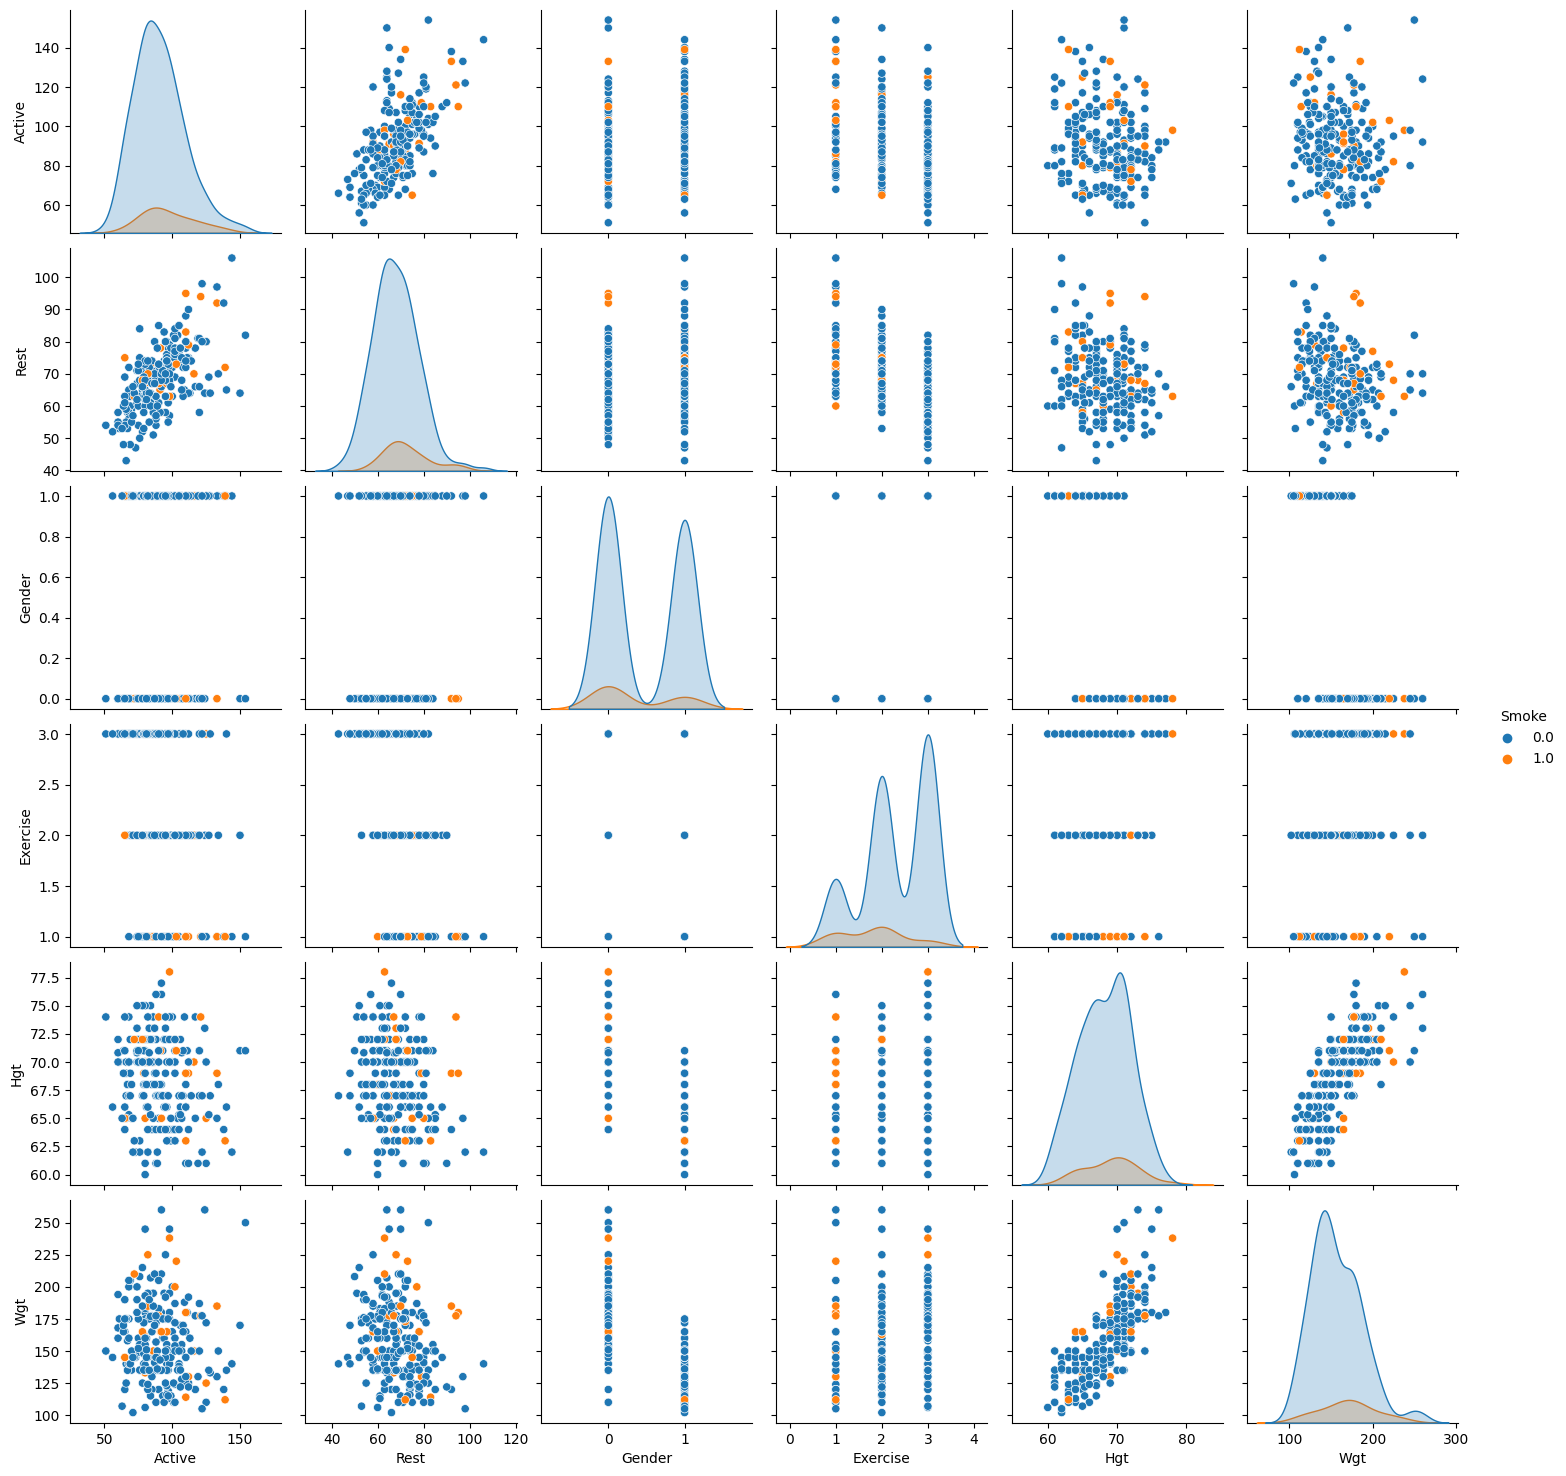

In [299]:
#Scatter plot
sns.pairplot(df,hue='Gender')
sns.pairplot(df,hue='Smoke')
print("Just by visualisation, we can see that Height v/s Weight and Active v/s Rest show strong linear corelation")

In [300]:
#Pearson correlation coefficeint
corrs = df.corr(method='pearson')
print("The pairs with a high coefficient of correlation are:")
for i in corrs.columns:
    for j in corrs.columns:
        if i==j:
            continue
        elif corrs[i][j] >0.5:
            print(i,"vs",j)


The pairs with a high coefficient of correlation are:
Active vs Rest
Rest vs Active
Hgt vs Wgt
Wgt vs Hgt


In [301]:
#Calculating the test and train dataframes
test_df = df.iloc[170:]
train_df = df.iloc[:170]
x_bar = np.mean(train_df['Active'])
y_bar = np.mean(train_df['Rest'])
print("The mean of the active heart rate is",x_bar,"and the mean of the rest heart rate is",y_bar)

The mean of the active heart rate is 91.80368286445014 and the mean of the rest heart rate is 68.44749550475213


In [302]:
#Calculating the beta0 and beta1
num = 0
denom = 0
for value in zip(train_df['Active'],train_df['Rest']):
    num = num + (value[0]-x_bar)*(value[1]-y_bar)
    denom = denom + ((value[0]-x_bar)**2)
b1 = num/denom
b0 = y_bar - b1*x_bar
print("The value of beta1 is",b1,"and the value of beta0 is",b0)

The value of beta1 is 0.2968731931183676 and the value of beta0 is 41.193443032756846


The linear regression model is:
y =  0.2968731931183676 *x +  41.193443032756846


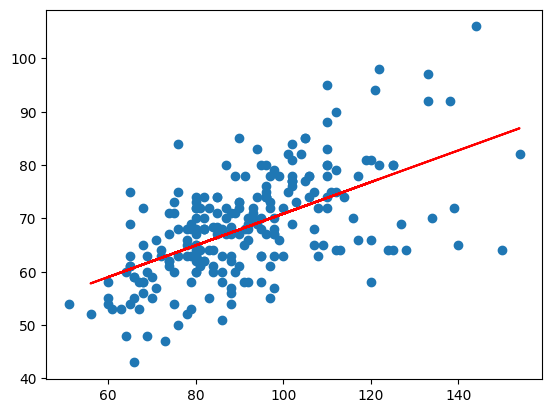

In [303]:
#Representing the linear regression model
print("The linear regression model is:")
print("y = ",b1,"*x + ",b0)

expected = []
for i in test_df['Active']:
    expected.append((b1*i)+b0)

plt.scatter(df['Active'],df['Rest'])
plt.plot(test_df['Active'],expected,color='red')
plt.show()

To show the goodness of linear regression, we will plot residual plot


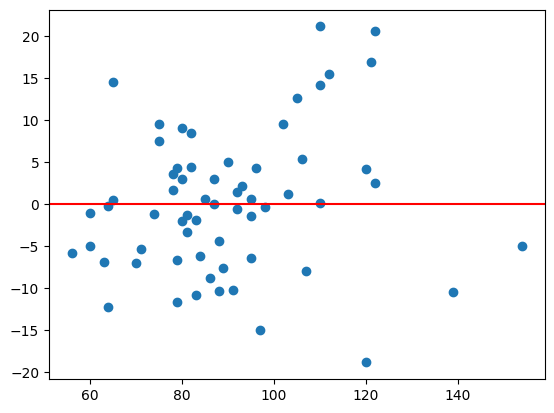

In [304]:
#Plotting residual errors
print("To show the goodness of linear regression, we will plot residual plot")
error = []
count = 0
for i in test_df['Rest']:
    error.append(i - expected[count])
    count+=1
plt.scatter(test_df['Active'],error)
plt.axhline(y = 0,color='red')
plt.show()

In [305]:
#Calculating the r square value
total_error = []
for i in test_df['Rest']:
    total_error.append((y_bar-i)**2)

error_sq = []
for i  in error:
    error_sq.append(i**2)

total_error_sum = sum(total_error)
error_sq_sum = sum(error_sq)
r_sq = (total_error_sum - error_sq_sum) / total_error_sum

print("The value of r square is",r_sq)

The value of r square is 0.417383372492378
